In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

2024-01-07 10:03:06.069408: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Get data set from cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

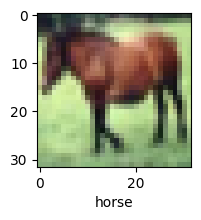

In [13]:
plot_sample(X_train, y_train, 7)

# Normalize training and test data

In [14]:
# Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255
X_test[:1]

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [15]:
X_test = X_test / 255.0
X_train = X_train / 255.0

In [16]:
X_train[:1]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# ANN 

In [17]:
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann_model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.8044 - accuracy: 0.3614
Epoch 2/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.6179 - accuracy: 0.4307
Epoch 3/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5372 - accuracy: 0.4591
Epoch 4/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4753 - accuracy: 0.4805
Epoch 5/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4252 - accuracy: 0.4984


# Classification Report

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [19]:
y_pred = ann_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.39      0.50      1000
           1       0.54      0.56      0.55      1000
           2       0.50      0.18      0.26      1000
           3       0.38      0.28      0.32      1000
           4       0.51      0.32      0.40      1000
           5       0.47      0.30      0.36      1000
           6       0.47      0.64      0.55      1000
           7       0.42      0.67      0.51      1000
           8       0.65      0.54      0.59      1000
           9       0.35      0.78      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



# Create CNN and train with the training set

In [24]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=62, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [28]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Trai the CNN model with training set

In [29]:
cnn_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 23s 14ms/step - loss: 1.4422 - accuracy: 0.4839
Epoch 2/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1028 - accuracy: 0.6148
Epoch 3/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9719 - accuracy: 0.6634
Epoch 4/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8837 - accuracy: 0.6944
Epoch 5/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8129 - accuracy: 0.7199


In [31]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9266 - accuracy: 0.6808


[0.9265760779380798, 0.6808000206947327]

In [32]:
y_pred = cnn_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.78      0.71      1000
           1       0.76      0.85      0.80      1000
           2       0.54      0.59      0.56      1000
           3       0.57      0.37      0.45      1000
           4       0.63      0.64      0.63      1000
           5       0.56      0.64      0.60      1000
           6       0.76      0.78      0.77      1000
           7       0.72      0.76      0.74      1000
           8       0.88      0.67      0.76      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

